In [1]:
# import the packages we'll use
## For data handling
import pandas as pd
import numpy as np
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
excel_file= 'Erdos_project_data_05.25.2020.xlsx'

In [3]:
#You may need to install py packages: 
#OpenPyXL, xlrd, xlwt, XlsxWriter

xlsx= pd.ExcelFile(excel_file)
sheets= []
toGet= ['Recession', 'Unemployment', 'GDP', 
        '2Y-Tsy', '5Y-Tsy', '10Y-Tsy', '30Y-Tsy',    
        'PCE_per_Capita', 'CPI_US_Avg', 'CPI_Purchase_Power_1913', 
        'Consumer_Credit', 'BankPrime', 'RE_Loans']
for sheet in toGet:
    sheets.append(xlsx.parse(sheet))

In [4]:
gdpEx= pd.concat(sheets, axis=1)
#gdpEx.head(7)

In [5]:
#This gets rid of the header created by the excel api.

#1.  Recession Time Periods Defined
usrecd= pd.DataFrame({'Date':gdpEx.iloc[6:,0], 'USRECD':gdpEx.iloc[6:,1]})
usrecd.index= pd.to_datetime(usrecd['Date'])
usrecd['USRECD']= pd.to_numeric(usrecd['USRECD'],errors='coerce')
usrecd= usrecd.drop(columns = ['Date'])
usrecd= usrecd.dropna()

#2.  Unemployment Rate Info
unrate= pd.DataFrame({'Date':gdpEx.iloc[6:,2], 'UNRATE':gdpEx.iloc[6:,3]})
unrate.index= pd.to_datetime(unrate['Date'])
unrate['UNRATE']= pd.to_numeric(unrate['UNRATE'],errors='coerce')
unrate= unrate.drop(columns = ['Date'])
unrate= unrate.dropna()

#3.  GPD Info
gdpx= pd.DataFrame({'Date':gdpEx.iloc[6:,4], 'GDPC1':gdpEx.iloc[6:,5]})
gdpx.index= pd.to_datetime(gdpx['Date'])
gdpx['GDPC1']= pd.to_numeric(gdpx['GDPC1'],errors='coerce')
gdpx= gdpx.drop(columns = ['Date'])
gdpx= gdpx.dropna() 

#4.  2Y Constant Maturity Rate Info
t2y= pd.DataFrame({'Date':gdpEx.iloc[6:,6], 'DGS2Y':gdpEx.iloc[6:,7]})
t2y.index= pd.to_datetime(t2y['Date'])
t2y['DGS2Y']= pd.to_numeric(t2y['DGS2Y'],errors='coerce')
t2y= t2y.drop(columns = ['Date'])
t2y= t2y.dropna() #no nan in excell

#5.  5Y Constant Maturity Rate Info
t5y= pd.DataFrame({'Date':gdpEx.iloc[6:,8], 'DGS5Y':gdpEx.iloc[6:,9]})
t5y.index = pd.to_datetime(t5y['Date'])
t5y['DGS5Y'] = pd.to_numeric(t5y['DGS5Y'],errors='coerce')
t5y = t5y.drop(columns = ['Date'])
t5y= t5y.dropna() #no nan in excell

#6.  10Y Constant Maturity Rate Info
t10y= pd.DataFrame({'Date':gdpEx.iloc[6:,10], 'DGS10Y':gdpEx.iloc[6:,11]})
t10y.index= pd.to_datetime(t10y['Date'])
t10y['DGS10Y']= pd.to_numeric(t10y['DGS10Y'],errors='coerce')
t10y= t10y.drop(columns = ['Date'])
t10y= t10y.dropna() #no nan in excell

#7.  30Y Constant Maturity Rate Info
t30y= pd.DataFrame({'Date':gdpEx.iloc[6:,12], 'DGS30Y':gdpEx.iloc[6:,13]})
t30y.index= pd.to_datetime(t30y['Date'])
t30y['DGS30Y']= pd.to_numeric(t30y['DGS30Y'],errors='coerce')
t30y= t30y.drop(columns = ['Date'])
t30y= t30y.dropna() #no nan in excell

#8.  Personal Consumption Expenditures Per Capita Info
pce= pd.DataFrame({'Date':gdpEx.iloc[6:,14], 'PCE per Capita':gdpEx.iloc[6:,15]})
pce.index= pd.to_datetime(pce['Date'])
pce['PCE per Capita']= pd.to_numeric(pce['PCE per Capita'],errors='coerce')
pce= pce.drop(columns = ['Date'])
pce= pce.dropna() #no nan in excell

#9.  Consumer Price Index Info
cpi= pd.DataFrame({'Date':gdpEx.iloc[6:,16], 'CPI':gdpEx.iloc[6:,17]})
#cpi= cpi.reset_index(drop=True)
cpi.index= pd.to_datetime(cpi['Date'])
cpi['CPI'] = pd.to_numeric(cpi['CPI'],errors='coerce')
cpi= cpi.drop(columns = ['Date'])
cpi= cpi.dropna() #no nan in excell

#10.  Consumer Price Index - Purchaing Power of the Consumer Dollar since 1913 Info
cpipp= pd.DataFrame({'Date':gdpEx.iloc[6:,18], 'CPICC':gdpEx.iloc[6:,19]})
cpipp.index= pd.to_datetime(cpipp['Date'])
cpipp['CPICC'] = pd.to_numeric(cpipp['CPICC'],errors='coerce')
cpipp= cpipp.drop(columns = ['Date'])
cpipp= cpipp.dropna() #no nan in excell

#11.  Consumer Credit Info
cc= pd.DataFrame({'Date':gdpEx.iloc[6:,20], 'Consumer Credit':gdpEx.iloc[6:,21]})
cc.index= pd.to_datetime(cc['Date'])
cc['Consumer Credit'] = pd.to_numeric(cc['Consumer Credit'],errors='coerce')
cc= cc.drop(columns = ['Date'])
cc= cc.dropna() #no nan in excell

#12.  Bank Prime Loan Rate Info
dprime= pd.DataFrame({'Date':gdpEx.iloc[6:,22], 'DPrime':gdpEx.iloc[6:,23]})
dprime.index= pd.to_datetime(dprime['Date'])
dprime['DPrime'] = pd.to_numeric(dprime['DPrime'],errors='coerce')
dprime= dprime.drop(columns = ['Date'])
dprime= dprime.dropna() #no nan in excell

#13.  Real Estate Loans Info
rel= pd.DataFrame({'Date':gdpEx.iloc[6:,24], 'RE Loans':gdpEx.iloc[6:,25]})
rel.index= pd.to_datetime(rel['Date'])
rel['RE Loans'] = pd.to_numeric(rel['RE Loans'],errors='coerce')
rel= rel.drop(columns = ['Date'])
rel= rel.dropna() #no nan in excell

In [61]:
#rec_periods is a binary value where 1 means that we are in a recession at a partcular date
rec_periods= pd.merge_ordered(usrecd, gdpx, fill_method='ffill', on='Date')
rec_periods.index= pd.to_datetime(rec_periods['Date'])
rec_periods['USRECD'] = pd.to_numeric(rec_periods['USRECD'],errors='coerce')
rec_periods['GDPC1'] = pd.to_numeric(rec_periods['GDPC1'],errors='coerce')
rec_periods= rec_periods.drop(columns = ['Date'])
rec_periods= rec_periods.fillna(0)
rec_periods

#below added
rec_periods= rec_periods.loc['1947-1-1 00:00:00':]

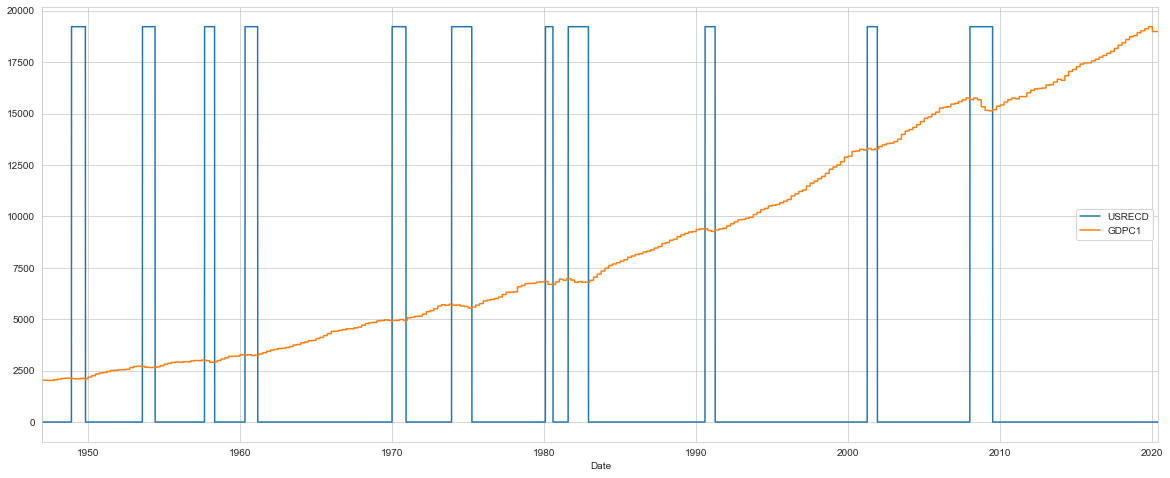

In [62]:
#The blue rectangles represent recessions.

rec_periods['USRECD']= rec_periods['USRECD']*rec_periods['GDPC1'].max()
rec_periods.plot(figsize=(20,8))
plt.show()

In [8]:
Tsy= t5y.join(t10y)
Tsy= Tsy.join(t2y)
Tsy= Tsy.join(t30y)
Tsy=Tsy.fillna(0)

temp = Tsy['DGS2Y']
Tsy.drop(labels=['DGS2Y'], axis=1, inplace = True)
Tsy.insert(0, 'DGS2Y', temp)

Tsy

,DGS2Y,DGS5Y,DGS10Y,DGS30Y
Date,,,,
1962-01-02,0.00,3.88,4.06,0.00
1962-01-03,0.00,3.87,4.03,0.00
1962-01-04,0.00,3.86,3.99,0.00
1962-01-05,0.00,3.89,4.02,0.00
1962-01-08,0.00,3.91,4.03,0.00
...,...,...,...,...
2020-05-15,0.16,0.31,0.64,1.32
2020-05-18,0.18,0.38,0.73,1.44
2020-05-19,0.17,0.35,0.70,1.43


In [71]:
#Here we average the daily rate values into monthly values
t2ym= t2y.groupby(pd.Grouper(freq='M')).mean()
t5ym= t5y.groupby(pd.Grouper(freq='M')).mean()
t10ym= t10y.groupby(pd.Grouper(freq='M')).mean()
t30ym= t30y.groupby(pd.Grouper(freq='M')).mean()

TsyM= t5ym.join(t10ym)
TsyM= TsyM.join(t2ym)
TsyM= TsyM.join(t30ym)

temp = TsyM['DGS2Y']
TsyM.drop(labels=['DGS2Y'], axis=1, inplace = True)
TsyM.insert(0, 'DGS2Y', temp)

TsyM_GDP= pd.merge_ordered(TsyM, gdpx, fill_method='ffill', on='Date')
temp = TsyM_GDP['GDPC1']
TsyM_GDP.drop(labels=['GDPC1'], axis=1, inplace = True)
TsyM_GDP.insert(1, 'GDPC1', temp)
TsyM_GDP.tail(292)

###The 30year rate is missing many values in '02 and '03, so it will not be used.

TsyM_GDP.index= pd.to_datetime(TsyM_GDP['Date'])
TsyM_GDP= TsyM_GDP.drop(columns = ['Date'])
TsyM_GDP= TsyM_GDP.fillna(0)


TsyM_GDP.loc['date' >= '1977']

TsyM_GDP.to_csv('pdout.csv')

,Date,GDPC1,DGS2Y,DGS5Y,DGS10Y,DGS30Y
702,2002-02-28,13397.002,3.015263,4.298421,4.911579,5.400909
703,2002-03-31,13397.002,3.557500,4.738000,5.284000,NaN
704,2002-04-01,13478.152,3.557500,4.738000,5.284000,NaN
705,2002-04-30,13478.152,3.422727,4.646818,5.210909,NaN
706,2002-05-31,13478.152,3.264091,4.494545,5.164545,NaN
...,...,...,...,...,...,...
989,2020-01-31,18987.877,1.519048,1.562381,1.757619,2.216190
990,2020-02-29,18987.877,1.331053,1.323684,1.504211,1.970526
991,2020-03-31,18987.877,0.448182,0.591818,0.870000,1.455000
992,2020-04-30,18987.877,0.224762,0.388095,0.657619,1.265238


In [73]:
TsyM_GDP.corr()

#df= TsyM_GDP.reset_index()


,GDPC1,DGS2Y,DGS5Y,DGS10Y,DGS30Y
GDPC1,1.000000,-0.856414,-0.622646,-0.592596,-0.913705
DGS2Y,-0.856414,1.000000,0.991805,0.976468,0.961378
DGS5Y,-0.622646,0.991805,1.000000,0.993100,0.985475
DGS10Y,-0.592596,0.976468,0.993100,1.000000,0.996779
DGS30Y,-0.913705,0.961378,0.985475,0.996779,1.000000


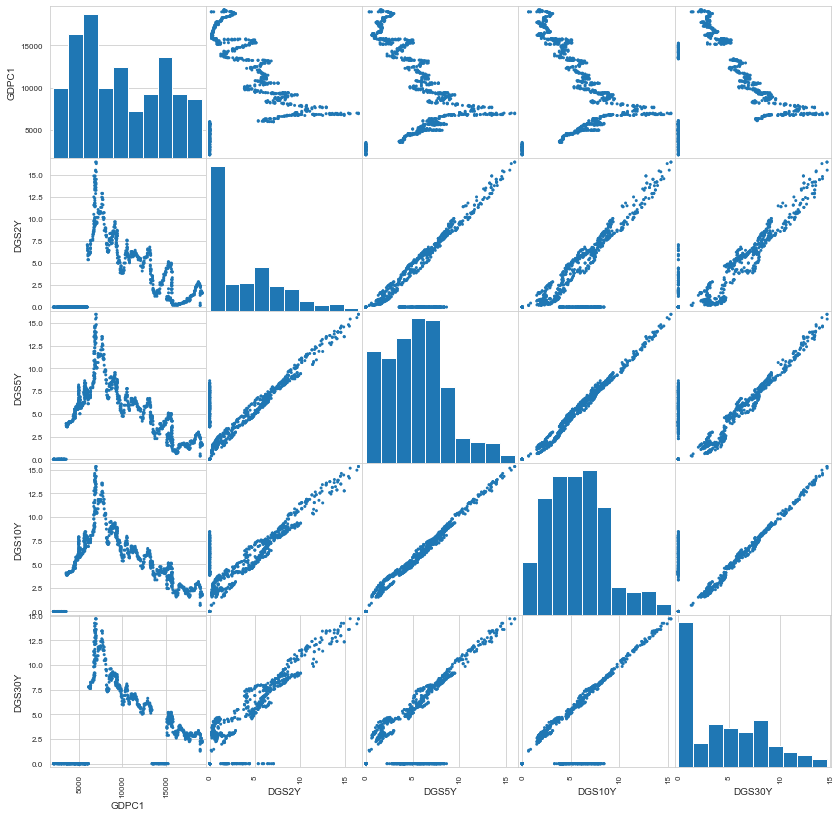

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(TsyM_GDP, figsize = (14,14), alpha = 1)

plt.show()